In [1]:
from chesslab.agent_torch import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

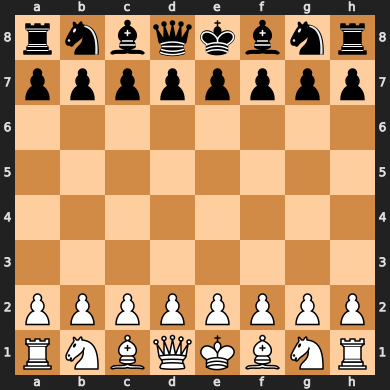

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/torch_weights.0.{}.pt'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

device: cuda


Move.from_uci('h2h3')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.6304394 , 0.6391056 , 0.63084096, 0.62613803, 0.67658573,
       0.6528    , 0.6368437 , 0.6232919 , 0.61065537, 0.63535315,
       0.63579774, 0.6533704 , 0.66291106, 0.6259107 , 0.60911256,
       0.64725924, 0.6515619 , 0.66914916, 0.6712408 , 0.6696851 ],
      dtype=float32)

In [9]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('h2h3'), 0.6765857338905334],
       [Move.from_uci('b2b4'), 0.6712408065795898],
       [Move.from_uci('a2a4'), 0.6696851253509521],
       [Move.from_uci('c2c4'), 0.6691491603851318],
       [Move.from_uci('h2h4'), 0.662911057472229],
       [Move.from_uci('a2a3'), 0.6533703804016113],
       [Move.from_uci('g2g3'), 0.6528000235557556],
       [Move.from_uci('d2d4'), 0.6515619158744812],
       [Move.from_uci('e2e4'), 0.6472592353820801],
       [Move.from_uci('g1f3'), 0.6391056180000305],
       [Move.from_uci('f2f3'), 0.6368436813354492],
       [Move.from_uci('b2b3'), 0.6357977390289307],
       [Move.from_uci('c2c3'), 0.635353147983551],
       [Move.from_uci('b1c3'), 0.6308409571647644],
       [Move.from_uci('g1h3'), 0.6304394006729126],
       [Move.from_uci('b1a3'), 0.6261380314826965],
       [Move.from_uci('g2g4'), 0.6259106993675232],
       [Move.from_uci('e2e3'), 0.6232919096946716],
       [Move.from_uci('d2d3'), 0.6106553673744202],
       [Move.f

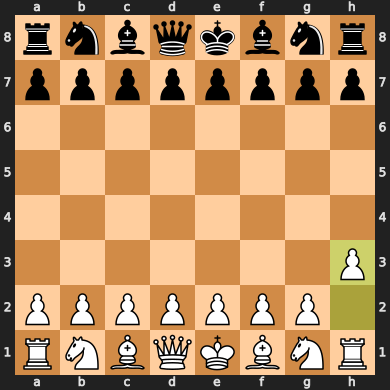

In [10]:
board.push(move)
board

In [11]:
kaufman_test(deepbot)

0.16

In [12]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 4/25 = 0.16 | weighted = 0.64
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 28 & 48 & 0.4255 & 0.6457 & c1c7 & 0.8579  \\
02 & f5d4 & 14 & 39 & 0.6579 & 0.3916 & d7d4 & 0.5435  \\
03 & e1d1 & 24 & 38 & 0.3784 & 0.6546 & f2f7 & 0.9049  \\
04 & b1b2 & 4 & 47 & 0.9348 & 0.6951 & d2d5 & 0.7181  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.5867 & c8c3 & 0.6564  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4464 & a3a2 & 0.4464  \\
07 & b7e4 & 8 & 33 & 0.7812 & 0.4113 & c7c5 & 0.4353  \\
08 & h7h6 & 14 & 39 & 0.6579 & 0.2908 & f8f3 & 0.5437  \\
09 & f3e2 & 29 & 35 & 0.1765 & 0.5866 & d2b4 & 0.6691  \\
10 & d5c3 & 17 & 41 & 0.6000 & 0.3660 & c7c3 & 0.5362  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9873 & g3f5 & 0.9873  \\
12 & c6d6 & 24 & 41 & 0.4250 & 0.2430 & e7e3 & 0.3910  \\
13 & c3d5 & 6 & 30 & 0.8276 & 0.7811 & f1f6 & 0.9162  \\
14 & b1b2 & 28 & 49 & 0.4375 & 0.7432 & d3g6 & 0.9132  \\
15 & d3f5 & 13 & 51 & 0.7600 & 0.8660 & e1e6 & 0.9344  \\
16 & b3b4 & 5 & 10 & 0.5556 & 0.4516 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.645702,c1c7,0.857892,28,48,0.425532
1,f5d4,0.391641,d7d4,0.543520,14,39,0.657895
2,e1d1,0.654597,f2f7,0.904896,24,38,0.378378
3,b1b2,0.695052,d2d5,0.718076,4,47,0.934783
4,g5c1,0.586749,c8c3,0.656351,2,48,0.978723
5,a3a2,0.446369,a3a2,0.446369,1,31,1.000000
6,b7e4,0.411339,c7c5,0.435294,8,33,0.781250
7,h7h6,0.290792,f8f3,0.543671,14,39,0.657895
8,f3e2,0.586626,d2b4,0.669106,29,35,0.176471
9,d5c3,0.366040,c7c3,0.536173,17,41,0.600000


In [13]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda
device: cuda


In [20]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


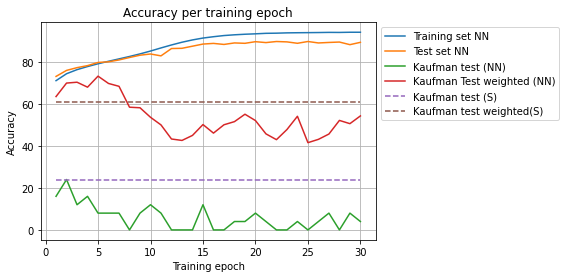

In [21]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [32]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 71.11 & 73.13 & 16.00 & 63.53 \\
02 & 74.41 & 75.99 & 24.00 & 69.96 \\
03 & 76.36 & 77.31 & 12.00 & 70.37 \\
04 & 77.82 & 78.27 & 16.00 & 68.01 \\
05 & 79.15 & 79.78 & 8.00 & 73.26 \\
06 & 80.34 & 80.09 & 8.00 & 69.77 \\
07 & 81.48 & 80.98 & 8.00 & 68.41 \\
08 & 82.63 & 82.15 & 0.00 & 58.46 \\
09 & 83.86 & 83.23 & 8.00 & 58.20 \\
10 & 85.22 & 83.81 & 12.00 & 53.66 \\
11 & 86.70 & 82.92 & 8.00 & 50.02 \\
12 & 88.12 & 86.41 & 0.00 & 43.31 \\
13 & 89.42 & 86.52 & 0.00 & 42.63 \\
14 & 90.52 & 87.53 & 0.00 & 45.02 \\
15 & 91.41 & 88.54 & 12.00 & 50.19 \\
16 & 92.05 & 88.86 & 0.00 & 46.12 \\
17 & 92.60 & 88.36 & 0.00 & 50.09 \\
18 & 92.95 & 89.08 & 4.00 & 51.59 \\
19 & 93.22 & 88.90 & 4.00 & 55.11 \\
20 & 93.42 & 89.67 & 8.00 & 52.10 \\
21 & 93.66 & 89.24 & 4.00 & 45.76 \\
22 & 93.73 & 89.76 & 0.00 & 43.00 \\
23 & 93.88 & 89.58 & 0.00 & 47.82 \\
24 & 93.94 & 88.91 & 4.

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.711104,0.731345,0.16,0.635310
2,0.744096,0.759940,0.24,0.699588
3,0.763553,0.773059,0.12,0.703654
4,0.778242,0.782711,0.16,0.680050
5,0.791494,0.797757,0.08,0.732561
6,0.803414,0.800911,0.08,0.697700
7,0.814778,0.809787,0.08,0.684128
8,0.826266,0.821454,0.00,0.584589
9,0.838569,0.832343,0.08,0.581989
10,0.852200,0.838121,0.12,0.536584
